In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

#for 'data (data,data)' type file
def spitdata(filename,xmin=0,xmax=math.inf,option="yes"):
    with open(filename) as f:
        rawdata = f.readlines()
    x = []
    y = []
    z = []
    for i in range (0, len(rawdata)):
        xtemp = float(rawdata[i].split('\t')[0])
        ytemp = float(rawdata[i].split('\t')[1].split(',')[0][1:-2])
        ztemp = float(rawdata[i].split('\t')[1].split(',')[1][:-3])
        if(xtemp>xmin and xtemp<xmax):
            x.append(xtemp)
            y.append(ytemp)
            z.append(ztemp)
    if(option != "no"):
        for i in range (0, len(z)):
            if(z[i] > 0):
                z[i] = -360+z[i]
    return x,y,z
#for 'data data' type file
def spitdata2(filename,xmin=0,xmax=math.inf):
    with open(filename) as f:
        rawdata = f.readlines()
    data = []
    x = []
    y = []
    for i in range (0, len(rawdata)):
        xtemp = float(rawdata[i].split('\t')[0])
        ytemp = float(rawdata[i].split('\t')[1])
        if(xtemp > xmin and xtemp < xmax):
            x.append(xtemp)
            y.append(ytemp)
    return x,y

## BPF

slope: 3.5787 (x < 200k)
slope: -3.6847 (x < 200k)
0 -97.3130993643302
1 -97.4146268126571
2 -97.5202286648032
3 -97.6299714813411
4 -97.7439247782672
5 -97.8621611212115
6 -97.9847562255734
7 -98.1117890629834
8 -98.2433419745205
9 -98.3795007911534
10 -98.5203549619067
11 -98.6659976903014
12 -98.8165260796586
13 -98.9720412879081
14 -99.132648692598
15 -99.2984580668589
16 -99.4695837671431
17 -99.6461449336305
18 -99.8282657042692
19 -100.016075443508
20 -100.209708986871
21 -100.409306902623
22 -100.615015771904
23 -100.826988488822
24 -101.045384582132
25 -101.270370560306
26 -101.502120281938
27 -101.740815353642
28 -101.986645557794
29 -102.239809312717
30 -102.500514168151
31 -102.768977339151
32 -103.045426281874
33 -103.330099315069
34 -103.623246291499
35 -103.92512932396
36 -104.236023571077
37 -104.556218088617
38 -104.886016752708
39 -105.225739262061
40 -105.575722227107
41 -105.936320354894
42 -106.307907739617
43 -106.690879269842
44 -107.085652164833
45 -107.49266765

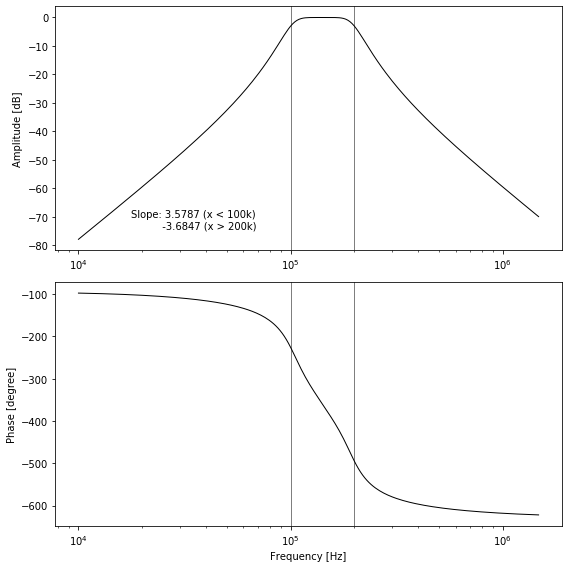

In [26]:
bpf_b_x,bpf_b_y,bpf_b_z = spitdata("BPF_B_f.txt",1000,1500000)
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8), tight_layout = True)

#trendline
new_x = []
new_y = []
for i in range (0, len(bpf_b_x)):
    if(bpf_b_x[i]<100000):
        new_x.append(bpf_b_x[i])
        new_y.append(bpf_b_y[i])  
bpf_b_x_np = np.array(new_x)
bpf_b_y_np = np.array(new_y)
slope, intercept = np.polyfit(np.log10(bpf_b_x_np), bpf_b_y_np, 1)
print("slope: "+str(round(slope/20,4))+ " (x < 200k)")
slope1 = slope

#trendline
new_x = []
new_y = []
for i in range (0, len(bpf_b_x)):
    if(bpf_b_x[i]>200000):
        new_x.append(bpf_b_x[i])
        new_y.append(bpf_b_y[i])  
bpf_b_x_np = np.array(new_x)
bpf_b_y_np = np.array(new_y)
slope, intercept = np.polyfit(np.log10(bpf_b_x_np), bpf_b_y_np, 1)
print("slope: "+str(round(slope/20,4))+ " (x < 200k)")
slope2 = slope

for i in range (0, len(bpf_b_x)):
    print(i,bpf_b_z[i])
    
for i in range (116,len(bpf_c_x)):
    bpf_b_z[i] -= 360

print("BPF(Butterworth) Frequency Response")
ax1.set_xscale('log')
ax1.plot(bpf_b_x,bpf_b_y,c='black',linewidth=1)
ax1.set_ylabel("Amplitude [dB]")
ax1.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)
ax1.axvline(100000,ymin=0,ymax=1,c='black',linewidth=0.5)
ax1.text(0.15, 0.15, "Slope: "+str(round(slope1/20,4))+ " (x < 100k)", verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.15, 0.1, "          "+str(round(slope2/20,4))+ " (x > 200k)", verticalalignment='center', transform=ax1.transAxes)

ax2.set_xscale("log")
ax2.plot(bpf_b_x,bpf_b_z,c='black',linewidth=1)
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Phase [degree]")
ax2.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)
ax2.axvline(100000,ymin=0,ymax=1,c='black',linewidth=0.5)

#plt.show()
plt.savefig("figures/BPF_B_f.png")

In [1]:
bpf_c_x,bpf_c_y,bpf_c_z = spitdata("BPF_C_f.txt",1000,1500000)
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8), tight_layout = True)

#trendline
new_x = []
new_y = []
for i in range (0, len(bpf_c_x)):
    if(bpf_c_x[i]<100000):
        new_x.append(bpf_c_x[i])
        new_y.append(bpf_c_y[i])  
bpf_c_x_np = np.array(new_x)
bpf_c_y_np = np.array(new_y)
slope, intercept = np.polyfit(np.log10(bpf_c_x_np), bpf_c_y_np, 1)
print("slope: "+str(round(slope/20,4))+ " (x < 200k)")
slope1 = slope

#trendline
new_x = []
new_y = []
for i in range (0, len(bpf_c_x)):
    if(bpf_c_x[i]>200000):
        new_x.append(bpf_c_x[i])
        new_y.append(bpf_c_y[i])  
bpf_c_x_np = np.array(new_x)
bpf_c_y_np = np.array(new_y)
slope, intercept = np.polyfit(np.log10(bpf_c_x_np), bpf_c_y_np, 1)
print("slope: "+str(round(slope/20,4))+ " (x < 200k)")
slope2 = slope

#for i in range (0, len(bpf_c_x)):
#    print(i,bpf_c_z[i])
    
for i in range (116,len(bpf_c_x)):
    bpf_c_z[i] -= 360

print("BPF(Chebyshev) Frequency Response")
ax1.set_xscale('log')
ax1.plot(bpf_c_x,bpf_c_y,c='black',linewidth=1)
ax1.set_ylabel("Amplitude [dB]")
ax1.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)
ax1.axvline(100000,ymin=0,ymax=1,c='black',linewidth=0.5)
ax1.text(0.15, 0.15, "Slope: "+str(round(slope1/20,4))+ " (x < 100k)", verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.15, 0.1, "          "+str(round(slope2/20,4))+ " (x > 200k)", verticalalignment='center', transform=ax1.transAxes)

ax2.set_xscale("log")
ax2.plot(bpf_c_x,bpf_c_z,c='black',linewidth=1)
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Phase [degree]")
ax2.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)
ax2.axvline(100000,ymin=0,ymax=1,c='black',linewidth=0.5)

#plt.show()

plt.savefig("figures/BPF_C_f.png")

NameError: name 'spitdata' is not defined

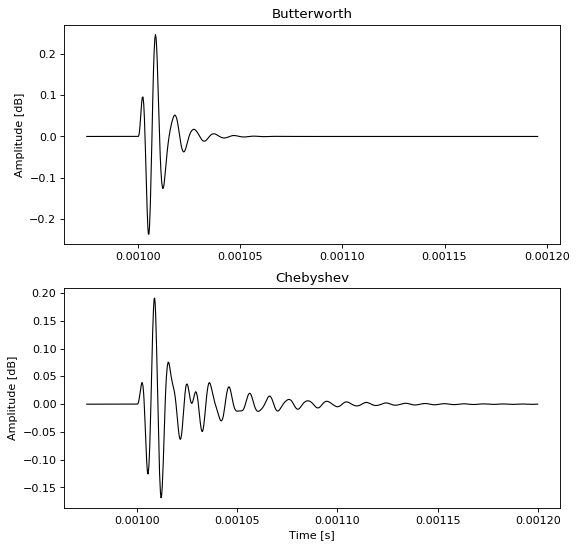

In [13]:
plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2, 1, 1)
butter_x,butter_y = spitdata2("BPF_B_s.txt",xmax = 1.2*10**(-3))
butter_x.insert(0,0.000975)
butter_y.insert(0,0)

plt.title("Butterworth")
plt.plot(butter_x,butter_y,c='black',linewidth=1)
plt.ylabel("Amplitude [dB]")

plt.subplot(2, 1, 2)
cheby_x,cheby_y = spitdata2("BPF_C_s.txt",xmax = 1.2*10**(-3))
cheby_x.insert(0,0.000975)
cheby_y.insert(0,0)

plt.title("Chebyshev")
plt.plot(cheby_x,cheby_y,c='black',linewidth=1)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [dB]")

#plt.show()
plt.savefig("figures/BPF_BC_s.png")

## BEF

BEF(Butterworth) Frequency Responce


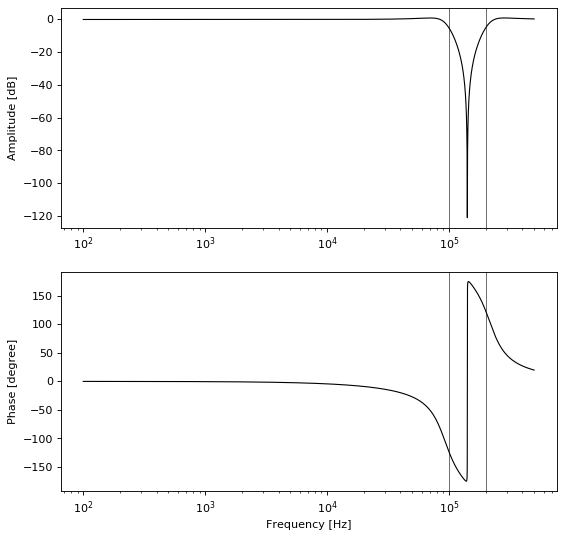

In [14]:
bef_b_x,bef_b_y,bef_b_z = spitdata("BEF_B_f.txt",xmin=100,option="no")

plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2, 1, 1)
print("BEF(Butterworth) Frequency Responce")
plt.xscale('log')
plt.plot(bef_b_x,bef_b_y,c='black',linewidth=1)
plt.ylabel("Amplitude [dB]")
plt.axvline(100000,ymin=0,ymax=1,c='black',linewidth=0.5)
plt.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)

#for i in range (0, len(bef_b_z)):
#    bef_b_z[i] = bef_b_z[i] + 360 
plt.subplot(2,1,2)
plt.xscale("log")
plt.plot(bef_b_x,bef_b_z,c='black',linewidth=1)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [degree]")
plt.axvline(100000,ymin=0,ymax=1,c='black',linewidth=0.5)
plt.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)

#plt.show()
plt.savefig("figures/BEF/B_f.png")

BEF(Chebyshev) Frequency Responce


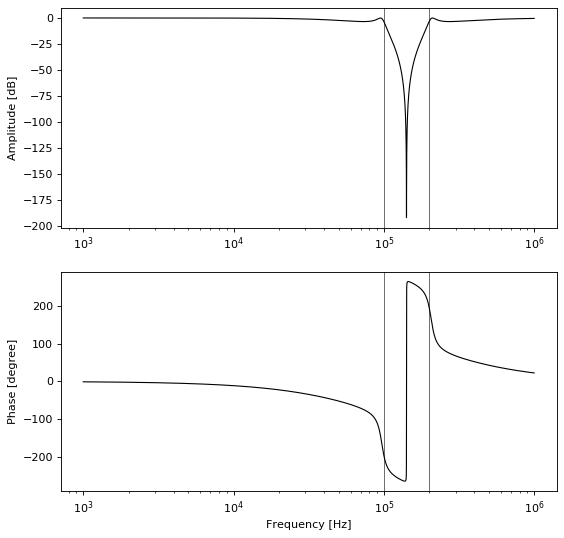

In [15]:
bef_c_x,bef_c_y,bef_c_z = spitdata("BEF_C_f.txt",option="no")

plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2, 1, 1)
print("BEF(Chebyshev) Frequency Responce")
plt.xscale('log')
plt.plot(bef_c_x,bef_c_y,c='black',linewidth=1)
plt.ylabel("Amplitude [dB]")
plt.axvline(100000,ymin=0,ymax=1,c='black',linewidth=0.5)
plt.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)

for i in range (0, len(bef_c_z)):
    if(bef_c_x[i] < 141328 and bef_c_x[i] > 98232):
        bef_c_z[i] = bef_c_z[i] - 360
    if(bef_c_x[i] > 141510 and bef_c_x[i] < 203630):
        bef_c_z[i] = bef_c_z[i] + 360
plt.subplot(2,1,2)
plt.xscale("log")
plt.plot(bef_c_x,bef_c_z,c='black',linewidth=1)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [degree]")
plt.axvline(100000,ymin=0,ymax=1,c='black',linewidth=0.5)
plt.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)
        

#plt.show()
plt.savefig("figures/BEF/C_f.png")

(Butterworth) Step Response


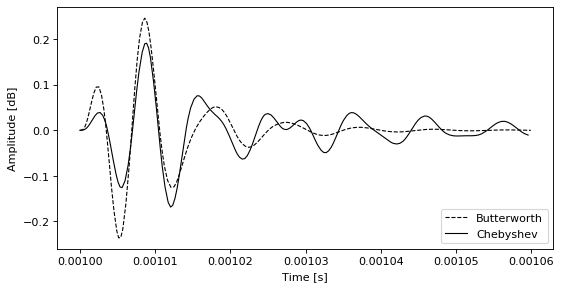

In [11]:
plt.figure(figsize=(8, 4), dpi=80)
type = "BPF"

butter_x,butter_y = spitdata2(type+"_B_s.txt",xmax = 1.06*10**(-3))
#butter_x.insert(0,0.00099)
#butter_y.insert(0,0)
print("(Butterworth) Step Response")
plt.plot(butter_x,butter_y,c='black',linewidth=1,linestyle='dashed')
plt.ylabel("Amplitude [dB]")

cheby_x,cheby_y = spitdata2(type+"_C_s.txt",xmax = 1.06*10**(-3))
#print("LPF(Chebyshev) Step Response")
plt.plot(cheby_x,cheby_y,c='black',linewidth=1)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [dB]")
plt.legend(["Butterworth", "Chebyshev"], loc ="lower right")

#plt.show()
plt.savefig("figures/"+type+"/BC_s.png")

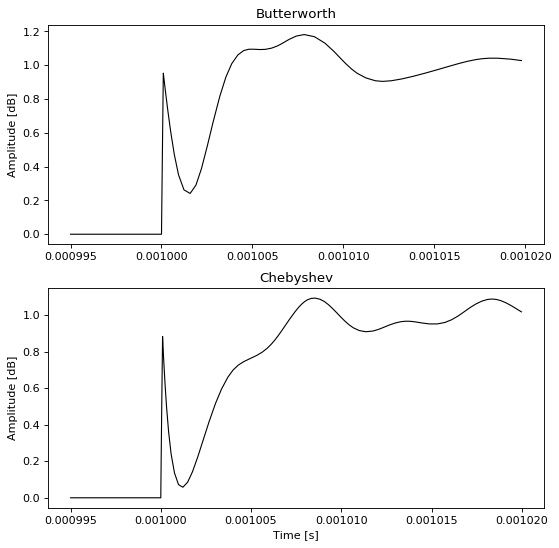

In [17]:
plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2, 1, 1)
butter_x,butter_y = spitdata2("BEF_B_s.txt",xmax = 1.02*10**(-3))
butter_x.insert(0,0.000995)
butter_y.insert(0,0)
plt.title("Butterworth")
plt.plot(butter_x,butter_y,c='black',linewidth=1)
plt.ylabel("Amplitude [dB]")

plt.subplot(2, 1, 2)
cheby_x,cheby_y = spitdata2("BEF_C_s.txt",xmax = 1.02*10**(-3))
cheby_x.insert(0,0.000995)
cheby_y.insert(0,0)
plt.title("Chebyshev")
plt.plot(cheby_x,cheby_y,c='black',linewidth=1)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [dB]")

#plt.show()
plt.savefig("figures/BEF/BC_s_expanded.png")